In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# This is new
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

from sklearn.preprocessing import StandardScaler

In [2]:
df1 = pd.read_csv('HR Employee Attrition.csv')

df_sub = df1[['Age','Attrition','BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobSatisfaction', 'PerformanceRating', 'WorkLifeBalance','YearsAtCompany']]

df_sub.head()
print(df_sub.columns)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,PerformanceRating,WorkLifeBalance,YearsAtCompany
0,41,Yes,Travel_Rarely,1102,Sales,1,2,4,3,1,6
1,49,No,Travel_Frequently,279,Research & Development,8,3,2,4,3,10
2,37,Yes,Travel_Rarely,1373,Research & Development,2,4,3,3,3,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,3,3,3,8
4,27,No,Travel_Rarely,591,Research & Development,2,1,2,3,3,2


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'PerformanceRating', 'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')


In [3]:
df1.isna().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [4]:
df_sub['Attrition'] = df_sub['Attrition'].replace(['Yes'],'1')
df_sub['Attrition'] = df_sub['Attrition'].replace(['No'],'0')

/var/folders/zk/_ry6kb852zb7th8syz9wtgf00000gn/T/ipykernel_47605/2785636699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['Attrition'] = df_sub['Attrition'].replace(['Yes'],'1')
/var/folders/zk/_ry6kb852zb7th8syz9wtgf00000gn/T/ipykernel_47605/2785636699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['Attrition'] = df_sub['Attrition'].replace(['No'],'0')


In [5]:
df_sub.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,PerformanceRating,WorkLifeBalance,YearsAtCompany
0,41,1,Travel_Rarely,1102,Sales,1,2,4,3,1,6
1,49,0,Travel_Frequently,279,Research & Development,8,3,2,4,3,10
2,37,1,Travel_Rarely,1373,Research & Development,2,4,3,3,3,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,3,3,3,8
4,27,0,Travel_Rarely,591,Research & Development,2,1,2,3,3,2


In [6]:
from sklearn.preprocessing import OneHotEncoder

def get_ohe(df, col):
    ohe = OneHotEncoder(drop='first', handle_unknown='error', sparse=False, dtype='int')
    ohe.fit(df[[col]])
    temp_df = pd.DataFrame(data=ohe.transform(df[[col]]), columns=ohe.get_feature_names())
    # If you have a newer version, replace with columns=ohe.get_feature_names_out()
    df.drop(columns=[col], axis=1, inplace=True)
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    return df

In [7]:
df_sub = get_ohe(df_sub, 'BusinessTravel')
df_sub = get_ohe(df_sub, 'Department')
df_sub.head()



/Users/shanghuahao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/var/folders/zk/_ry6kb852zb7th8syz9wtgf00000gn/T/ipykernel_47605/1613124509.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[col], axis=1, inplace=True)
/Users/shanghuahao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Age,Attrition,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,PerformanceRating,WorkLifeBalance,YearsAtCompany,x0_Travel_Frequently,x0_Travel_Rarely,x0_Research & Development,x0_Sales
0,41,1,1102,1,2,4,3,1,6,0,1,0,1
1,49,0,279,8,3,2,4,3,10,1,0,1,0
2,37,1,1373,2,4,3,3,3,0,0,1,1,0
3,33,0,1392,3,4,3,3,3,8,1,0,1,0
4,27,0,591,2,1,2,3,3,2,0,1,1,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(df_sub.drop(columns = ['Attrition'],axis = 1), df_sub['Attrition'], test_size=0.20, random_state = 2)

X_train
X_test
y_train
y_test


df_sub = StandardScaler()
X_train = pd.DataFrame(df_sub.fit_transform(X_train), columns = X_train.columns, index=X_train.index)
X_test = pd.DataFrame(df_sub.transform(X_test), columns = X_test.columns,index = X_test.index)
X_train
X_test
y_train
y_test

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,PerformanceRating,WorkLifeBalance,YearsAtCompany,x0_Travel_Frequently,x0_Travel_Rarely,x0_Research & Development,x0_Sales
285,37,1372,1,4,4,3,3,17,0,1,1,0
194,45,1195,2,1,4,4,3,20,0,0,1,0
323,28,1157,2,1,4,3,2,3,0,1,1,0
1015,34,560,1,4,1,3,3,4,1,0,1,0
1003,25,949,1,1,4,3,2,3,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
466,41,1276,2,2,1,3,3,18,0,1,0,1
299,51,1302,2,4,2,3,3,4,0,1,1,0
493,44,1112,1,1,3,3,4,2,0,1,0,0
527,32,929,10,4,4,3,2,10,0,1,0,1


,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,PerformanceRating,WorkLifeBalance,YearsAtCompany,x0_Travel_Frequently,x0_Travel_Rarely,x0_Research & Development,x0_Sales
721,50,939,24,4,3,3,3,12,0,1,1,0
843,26,1384,3,1,4,4,3,8,0,1,1,0
627,52,890,25,3,4,4,3,9,1,0,1,0
1368,34,735,22,3,4,3,3,15,1,0,1,0
305,36,1105,24,2,2,3,3,9,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
61,38,653,29,4,4,3,3,10,1,0,1,0
498,22,604,6,1,3,4,3,2,0,1,1,0
993,25,1372,18,1,3,3,2,3,0,1,0,1
308,58,390,1,4,3,3,3,5,0,0,1,0


285     0
194     0
323     1
1015    0
1003    0
       ..
466     0
299     0
493     0
527     0
1192    0
Name: Attrition, Length: 1176, dtype: object

721     0
843     0
627     0
1368    0
305     0
       ..
61      0
498     0
993     0
308     0
400     0
Name: Attrition, Length: 294, dtype: object

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,PerformanceRating,WorkLifeBalance,YearsAtCompany,x0_Travel_Frequently,x0_Travel_Rarely,x0_Research & Development,x0_Sales
285,0.02,1.40,-1.02,1.18,1.14,-0.43,0.34,1.66,-0.49,0.65,0.75,-0.67
194,0.90,0.96,-0.89,-1.57,1.14,2.35,0.34,2.15,-0.49,-1.54,0.75,-0.67
323,-0.97,0.87,-0.89,-1.57,1.14,-0.43,-1.07,-0.65,-0.49,0.65,0.75,-0.67
1015,-0.31,-0.59,-1.02,1.18,-1.53,-0.43,0.34,-0.48,2.04,-1.54,0.75,-0.67
1003,-1.30,0.36,-1.02,-1.57,1.14,-0.43,-1.07,-0.65,-0.49,0.65,0.75,-0.67
...,...,...,...,...,...,...,...,...,...,...,...,...
466,0.46,1.16,-0.89,-0.66,-1.53,-0.43,0.34,1.82,-0.49,0.65,-1.34,1.48
299,1.56,1.23,-0.89,1.18,-0.64,-0.43,0.34,-0.48,-0.49,0.65,0.75,-0.67
493,0.79,0.76,-1.02,-1.57,0.25,-0.43,1.75,-0.81,-0.49,0.65,-1.34,-0.67
527,-0.53,0.31,0.10,1.18,1.14,-0.43,-1.07,0.50,-0.49,0.65,-1.34,1.48


,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,PerformanceRating,WorkLifeBalance,YearsAtCompany,x0_Travel_Frequently,x0_Travel_Rarely,x0_Research & Development,x0_Sales
721,1.45,0.34,1.84,1.18,0.25,-0.43,0.34,0.83,-0.49,0.65,0.75,-0.67
843,-1.19,1.43,-0.77,-1.57,1.14,2.35,0.34,0.17,-0.49,0.65,0.75,-0.67
627,1.67,0.22,1.96,0.26,1.14,2.35,0.34,0.34,2.04,-1.54,0.75,-0.67
1368,-0.31,-0.16,1.59,0.26,1.14,-0.43,0.34,1.33,2.04,-1.54,0.75,-0.67
305,-0.09,0.74,1.84,-0.66,-0.64,-0.43,0.34,0.34,-0.49,-1.54,0.75,-0.67
...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.13,-0.36,2.46,1.18,1.14,-0.43,0.34,0.50,2.04,-1.54,0.75,-0.67
498,-1.63,-0.48,-0.40,-1.57,0.25,2.35,0.34,-0.81,-0.49,0.65,0.75,-0.67
993,-1.30,1.40,1.09,-1.57,0.25,-0.43,-1.07,-0.65,-0.49,0.65,-1.34,1.48
308,2.33,-1.00,-1.02,1.18,0.25,-0.43,0.34,-0.32,-0.49,-1.54,0.75,-0.67


285     0
194     0
323     1
1015    0
1003    0
       ..
466     0
299     0
493     0
527     0
1192    0
Name: Attrition, Length: 1176, dtype: object

721     0
843     0
627     0
1368    0
305     0
       ..
61      0
498     0
993     0
308     0
400     0
Name: Attrition, Length: 294, dtype: object

## model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'auto', penalty = 'none')
model.fit(X_train, y_train) 

# The following gives the mean accuracy on the given data and labels
model.score(X_train, y_train) 

# This is the coefficient Beta_1, ..., Beta_7
model.coef_

# This is the coefficient Beta_0
model.intercept_

In [9]:
model = LogisticRegression(fit_intercept = True, solver='liblinear', multi_class = 'auto', penalty = 'l2', C = 1)
#model = LogisticRegression(fit_intercept = True, solver='newton-cg', multi_class = 'auto', penalty = 'none', max_iter = 1000, C = 10)

model.fit(X_train, y_train)

#The following gives the mean accuracy on the given data and labels
model.score(X_train, y_train)

#This is the coefficient Beta_1, ..., Beta_7
model.coef_

#This is the coefficient Beta_0
model.intercept_

LogisticRegression(C=1, solver='liblinear')

0.8486394557823129

array([[-0.37911607, -0.15363417,  0.18665581, -0.33825338, -0.30140128,
         0.02330284, -0.28802585, -0.33150866,  0.45025201,  0.19741692,
        -0.28976314, -0.00616744]])

array([-1.90833489])

In [10]:
test_output = pd.DataFrame(model.predict(X_test), index = X_test.index, columns = ['pred_Attrition'])
test_output.head()

,pred_Attrition
721,0
843,0
627,0
1368,0
305,0


In [11]:
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
print('Percentage of correct predictions is ')
print(model.score(X_test, y_test))

,pred_Attrition,Attrition
721,0,0
843,0,0
627,0,0
1368,0,0
305,0,0


Percentage of correct predictions is 
0.8367346938775511


In [12]:
df_sub2 = df1[['Age','Attrition','BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobSatisfaction', 'PerformanceRating', 'WorkLifeBalance','YearsAtCompany','MaritalStatus']]

df_sub2.head()

df_sub2 = get_ohe(df_sub2, 'BusinessTravel')
df_sub2 = get_ohe(df_sub2, 'Department')
df_sub2 = get_ohe(df_sub2, 'Attrition')

df_sub2.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,PerformanceRating,WorkLifeBalance,YearsAtCompany,MaritalStatus
0,41,Yes,Travel_Rarely,1102,Sales,1,2,4,3,1,6,Single
1,49,No,Travel_Frequently,279,Research & Development,8,3,2,4,3,10,Married
2,37,Yes,Travel_Rarely,1373,Research & Development,2,4,3,3,3,0,Single
3,33,No,Travel_Frequently,1392,Research & Development,3,4,3,3,3,8,Married
4,27,No,Travel_Rarely,591,Research & Development,2,1,2,3,3,2,Married


/Users/shanghuahao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/var/folders/zk/_ry6kb852zb7th8syz9wtgf00000gn/T/ipykernel_47605/1613124509.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[col], axis=1, inplace=True)
/Users/shanghuahao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/shanghuahao/opt/anacond

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,PerformanceRating,WorkLifeBalance,YearsAtCompany,MaritalStatus,x0_Travel_Frequently,x0_Travel_Rarely,x0_Research & Development,x0_Sales,x0_Yes
0,41,1102,1,2,4,3,1,6,Single,0,1,0,1,1
1,49,279,8,3,2,4,3,10,Married,1,0,1,0,0
2,37,1373,2,4,3,3,3,0,Single,0,1,1,0,1
3,33,1392,3,4,3,3,3,8,Married,1,0,1,0,0
4,27,591,2,1,2,3,3,2,Married,0,1,1,0,0


In [13]:


X_train, X_test, y_train, y_test = train_test_split(df_sub2.drop(columns = ['MaritalStatus'],axis = 1), df_sub2['MaritalStatus'], test_size=0.20, random_state = 2)

X_train
X_test
y_train
y_test

df_sub2 = StandardScaler()
X_train = pd.DataFrame(df_sub2.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(df_sub2.transform(X_test), columns = X_test.columns)



,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,PerformanceRating,WorkLifeBalance,YearsAtCompany,x0_Travel_Frequently,x0_Travel_Rarely,x0_Research & Development,x0_Sales,x0_Yes
285,37,1372,1,4,4,3,3,17,0,1,1,0,0
194,45,1195,2,1,4,4,3,20,0,0,1,0,0
323,28,1157,2,1,4,3,2,3,0,1,1,0,1
1015,34,560,1,4,1,3,3,4,1,0,1,0,0
1003,25,949,1,1,4,3,2,3,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,41,1276,2,2,1,3,3,18,0,1,0,1,0
299,51,1302,2,4,2,3,3,4,0,1,1,0,0
493,44,1112,1,1,3,3,4,2,0,1,0,0,0
527,32,929,10,4,4,3,2,10,0,1,0,1,0


,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,PerformanceRating,WorkLifeBalance,YearsAtCompany,x0_Travel_Frequently,x0_Travel_Rarely,x0_Research & Development,x0_Sales,x0_Yes
721,50,939,24,4,3,3,3,12,0,1,1,0,0
843,26,1384,3,1,4,4,3,8,0,1,1,0,0
627,52,890,25,3,4,4,3,9,1,0,1,0,0
1368,34,735,22,3,4,3,3,15,1,0,1,0,0
305,36,1105,24,2,2,3,3,9,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,38,653,29,4,4,3,3,10,1,0,1,0,0
498,22,604,6,1,3,4,3,2,0,1,1,0,0
993,25,1372,18,1,3,3,2,3,0,1,0,1,0
308,58,390,1,4,3,3,3,5,0,0,1,0,0


285       Single
194      Married
323      Married
1015    Divorced
1003     Married
          ...   
466      Married
299     Divorced
493       Single
527       Single
1192    Divorced
Name: MaritalStatus, Length: 1176, dtype: object

721      Married
843      Married
627      Married
1368     Married
305      Married
          ...   
61        Single
498      Married
993      Married
308     Divorced
400     Divorced
Name: MaritalStatus, Length: 294, dtype: object

In [14]:
model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'ovr', penalty = 'none', max_iter = 100)

model.fit(X_train, y_train) 

# The following gives the mean accuracy on the given data and labels
model.score(X_train, y_train) 

# This is the coefficient Beta_1, ..., Beta_7
model.coef_

# This is the coefficient Beta_0
model.intercept_

LogisticRegression(multi_class='ovr', penalty='none')

0.483843537414966

array([[ 0.07138442,  0.08237795, -0.04751135, -0.01965579, -0.07873187,
        -0.05216146, -0.07349446,  0.01983936, -0.11449575, -0.14744609,
        -0.09657201, -0.20706819, -0.24316969],
       [ 0.11147008,  0.08219233,  0.11113723, -0.02188601, -0.06179201,
         0.0277134 ,  0.01100717,  0.01036311,  0.13649332,  0.18214652,
        -0.19322897, -0.13349832, -0.20754517],
       [-0.19200763, -0.16480818, -0.09445363,  0.04145396,  0.1362615 ,
         0.00827789,  0.04692884, -0.0273917 , -0.06054792, -0.08390798,
         0.35001086,  0.3652269 ,  0.36644813]])

array([-1.30759213, -0.19329194, -0.75571357])

In [15]:
test_output = pd.DataFrame(model.predict(X_test), index = X_test.index, columns = ['pred_MaritalStatus'])
test_output.head()

,pred_MaritalStatus
0,Married
1,Married
2,Married
3,Married
4,Married


In [16]:
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
print('Percentage of correct predictions is ')
print(model.score(X_test, y_test))

,pred_MaritalStatus,MaritalStatus
7,Married,Divorced
14,Married,Single
17,Married,Divorced
18,Married,Married
20,Married,Divorced


Percentage of correct predictions is 
0.47278911564625853


In [17]:
#df1['Attrition'] = df1['Attrition'].replace(['Yes'],'1')
#df1['Attrition'] = df1['Attrition'].replace(['No'],'0')
#df1['OverTime'] = df1['OverTime'].replace(['Yes'],'1')
#df1['OverTime'] = df1['OverTime'].replace(['No'],'0')
df1 = get_ohe(df1, 'Attrition')
df1 = get_ohe(df1, 'BusinessTravel')
df1 = get_ohe(df1, 'Department')
df1 = get_ohe(df1, 'EducationField')
df1 = get_ohe(df1, 'Gender')
df1 = get_ohe(df1, 'JobRole')
df1 = get_ohe(df1, 'Over18')
df1 = get_ohe(df1, 'OverTime')

print(df1.columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'x0_Yes', 'x0_Travel_Frequently', 'x0_Travel_Rarely',
       'x0_Research & Development', 'x0_Sales', 'x0_Life Sciences',
       'x0_Marketing', 'x0_Medical', 'x0_Other', 'x0_Technical Degree',
       'x0_Male', 'x0_Human Resources', 'x0_Laboratory Technician',
       'x0_Manager', 'x0_Manufacturing Director', 'x0_Research Director',
       'x0_Research Scientist', 'x0_Sales Executive',
       'x0_Sales Representative', '

/Users/shanghuahao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/shanghuahao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/shanghuahao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/shanghuahao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecatio

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop(columns = ['MaritalStatus'],axis = 1), df1['MaritalStatus'], test_size=0.20, random_state = 2)

X_train
X_test
y_train
y_test

df1 = StandardScaler()
X_train = pd.DataFrame(df1.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(df1.transform(X_test), columns = X_test.columns)


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,x0_Male,x0_Human Resources,x0_Laboratory Technician,x0_Manager,x0_Manufacturing Director,x0_Research Director,x0_Research Scientist,x0_Sales Executive,x0_Sales Representative,x0_Yes
285,37,1372,1,3,1,391,4,42,3,1,...,0,0,0,0,0,0,1,0,0,0
194,45,1195,2,2,1,264,1,65,2,4,...,1,0,0,1,0,0,0,0,0,0
323,28,1157,2,4,1,440,1,84,1,1,...,1,0,0,0,0,0,1,0,0,1
1015,34,560,1,4,1,1431,4,91,3,1,...,1,0,0,0,0,0,1,0,0,0
1003,25,949,1,3,1,1415,1,81,3,1,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,41,1276,2,5,1,625,2,91,3,4,...,0,0,0,1,0,0,0,0,0,0
299,51,1302,2,3,1,408,4,84,1,2,...,1,0,0,0,1,0,0,0,0,0
493,44,1112,1,4,1,665,1,50,2,2,...,0,1,0,0,0,0,0,0,0,0
527,32,929,10,3,1,722,4,55,3,2,...,1,0,0,0,0,0,0,1,0,0


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,x0_Male,x0_Human Resources,x0_Laboratory Technician,x0_Manager,x0_Manufacturing Director,x0_Research Director,x0_Research Scientist,x0_Sales Executive,x0_Sales Representative,x0_Yes
721,50,939,24,3,1,1005,4,95,3,4,...,1,0,0,0,1,0,0,0,0,1
843,26,1384,3,4,1,1177,1,82,4,1,...,1,0,1,0,0,0,0,0,0,0
627,52,890,25,4,1,867,3,81,2,4,...,0,0,0,0,1,0,0,0,0,0
1368,34,735,22,4,1,1932,3,86,2,2,...,1,0,0,0,0,0,1,0,0,1
305,36,1105,24,4,1,419,2,47,3,2,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,38,653,29,5,1,79,4,50,3,2,...,0,0,1,0,0,0,0,0,0,0
498,22,604,6,1,1,675,1,69,3,1,...,1,0,0,0,0,0,1,0,0,0
993,25,1372,18,1,1,1399,1,93,4,2,...,1,0,0,0,0,0,0,1,0,0
308,58,390,1,4,1,422,4,32,1,2,...,1,0,0,0,0,0,0,0,0,1


285       Single
194      Married
323      Married
1015    Divorced
1003     Married
          ...   
466      Married
299     Divorced
493       Single
527       Single
1192    Divorced
Name: MaritalStatus, Length: 1176, dtype: object

721      Married
843      Married
627      Married
1368     Married
305      Married
          ...   
61        Single
498      Married
993      Married
308     Divorced
400     Divorced
Name: MaritalStatus, Length: 294, dtype: object

In [19]:
#model = LogisticRegression(fit_intercept = True, solver='lbfgs', multi_class = 'ovr', penalty = 'l2', max_iter = 1000, C = 1.0)
#model = LogisticRegression(fit_intercept = True, solver='newton-cg', multi_class = 'ovr', penalty = 'l2', max_iter = 1000, C= 1)
model = LogisticRegression(fit_intercept = True, solver='liblinear', multi_class = 'ovr', penalty = 'l1', max_iter = 1000, C= 1)

model.fit(X_train, y_train) 

# The following gives the mean accuracy on the given data and labels
model.score(X_train, y_train) 

# This is the coefficient Beta_1, ..., Beta_7
model.coef_

# This is the coefficient Beta_0
model.intercept_



test_output = pd.DataFrame(model.predict(X_test), index = X_test.index, columns = ['pred_MaritalStatus'])
test_output.head()

test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
print('Percentage of correct predictions is ')
print(model.score(X_test, y_test))

LogisticRegression(C=1, max_iter=1000, multi_class='ovr', penalty='l1',
                   solver='liblinear')

0.7032312925170068

array([[ 7.05092541e-02,  3.70876934e-02, -1.06041629e-01,
        -2.58416875e-02,  0.00000000e+00, -2.17143633e-01,
        -2.98246808e-03, -1.27524861e-01, -5.11481694e-03,
        -2.36762107e-02, -8.34223774e-02,  0.00000000e+00,
         0.00000000e+00,  8.10850762e-03, -7.12561480e-02,
         0.00000000e+00,  4.67424845e-02,  0.00000000e+00,
         1.14076281e+00,  9.37746062e-02, -1.08980926e-02,
        -1.07718804e-01,  1.77076255e-01, -6.55020063e-02,
        -1.34017629e-01, -7.26541613e-02, -1.89273378e-01,
        -1.53091651e-01, -1.84336182e-01,  1.23479929e-01,
         0.00000000e+00,  0.00000000e+00,  2.61167591e-02,
        -2.41978397e-02,  5.24681111e-02,  0.00000000e+00,
         4.51807973e-02,  1.02980038e-01, -3.87522817e-02,
        -5.53646518e-02,  3.11896297e-02,  7.97322835e-03,
        -6.75127844e-03,  0.00000000e+00, -4.07375630e-02,
         1.19307524e-01],
       [ 1.54531968e-01,  7.76220897e-02,  8.04024985e-02,
        -5.22065002e-02,  0.00

array([-1.60833938, -0.19540159, -4.34914437])

,pred_MaritalStatus
0,Married
1,Married
2,Single
3,Single
4,Married


,pred_MaritalStatus,MaritalStatus
7,Single,Divorced
14,Single,Single
17,Divorced,Divorced
18,Divorced,Married
20,Married,Divorced


Percentage of correct predictions is 
0.6700680272108843


In [20]:
df_s = pd.read_csv('science_expt_data.csv')
df_s.head()

,X1,X2,X3,X4,Y
0,4.05,17.76,6.08,17.20,534.77
1,2.06,4.90,6.83,15.61,447.44
2,0.53,11.99,5.00,16.01,386.60
3,85.34,4.68,4.12,5.52,"1,405.32"
4,0.23,34.88,5.43,0.88,738.77


<AxesSubplot:xlabel='X1', ylabel='Y'>

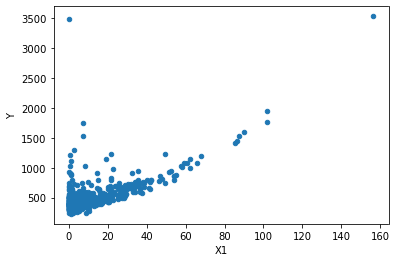

<AxesSubplot:xlabel='X2', ylabel='Y'>

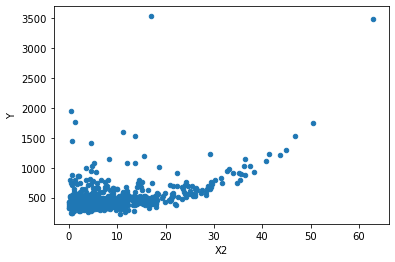

<AxesSubplot:xlabel='X3', ylabel='Y'>

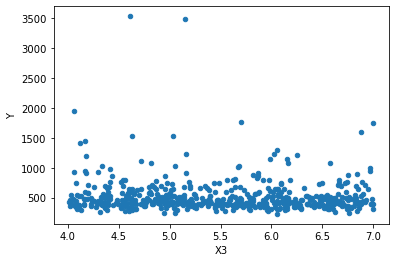

<AxesSubplot:xlabel='X4', ylabel='Y'>

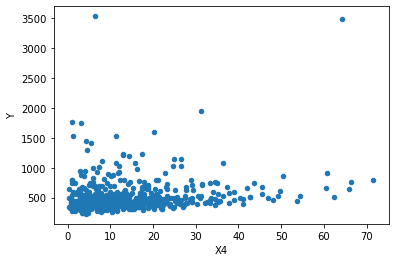

In [21]:
for col in df_s.drop(columns=['Y']).columns:
    
    df_s.plot(x = col, y = 'Y', kind = 'scatter')
#df_s.plot(x = 'X1', y = 'Y', kind = 'scatter')
    plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_s.drop(columns = ['Y'],axis = 1), df_s['Y'], test_size=0.20, random_state = 2)

X_train
X_test
y_train
y_test


,X1,X2,X3,X4
307,36.58,8.43,5.01,4.36
277,2.81,44.85,6.06,4.57
486,2.19,18.07,6.26,19.81
41,0.44,13.05,5.59,8.10
380,8.84,0.58,4.95,4.81
...,...,...,...,...
299,0.54,15.69,4.40,6.65
534,0.03,5.78,5.08,5.68
493,4.68,7.06,4.61,10.68
527,13.17,9.39,4.56,10.26


,X1,X2,X3,X4
363,4.00,3.43,6.35,4.43
176,0.01,2.96,4.36,42.63
192,0.07,1.11,6.73,7.46
77,32.51,5.82,5.96,3.78
320,8.88,9.19,5.60,6.94
...,...,...,...,...
497,1.96,2.88,6.86,11.88
519,2.81,8.52,4.66,1.76
24,4.07,8.99,4.55,18.61
38,4.37,3.88,6.63,7.87


307     630.05
277   1,287.78
486     409.39
41      453.41
380     239.45
        ...   
299     376.22
534     386.03
493     320.79
527     463.78
168     634.12
Name: Y, Length: 452, dtype: float64

363   388.71
176   505.72
192   366.29
77    661.84
320   473.04
       ...  
497   406.52
519   304.21
24    439.79
38    263.13
496   486.11
Name: Y, Length: 113, dtype: float64

In [23]:
model = LinearRegression(fit_intercept = True)

model.fit(X_train, y_train) 

# The following gives the R-square score
model.score(X_train, y_train) 

# This is the coefficient Beta_1 (or slope of the Simple Linear Regression line)
model.coef_

# This is the coefficient Beta_0
model.intercept_

LinearRegression()

0.7135508460514826

array([10.58004134, 16.36289846,  2.31514097,  3.79524388])

173.4788609504679

In [24]:
test_output = pd.DataFrame(model.predict(X_test), index = X_test.index, columns = ['predict Y'])
test_output.head()

,predict Y
363,303.44
176,393.90
192,236.38
77,640.73
320,457.14


In [25]:
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['predict Y'] - test_output['Y']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
print('Fraction MAE is ')
print(mean_absolute_error / test_output['Y'].mean())
print('Percentage of correct predictions is ')
print(model.score(X_test, y_test))

,predict Y,Y
363,303.44,388.71
176,393.90,505.72
192,236.38,366.29
77,640.73,661.84
320,457.14,473.04


Mean absolute error is 
87.0872695766073
Fraction MAE is 
0.16810263818922502
Percentage of correct predictions is 
0.7715039222659945


In [26]:
new_df = df_s[['Y','X1','X4']]
new_df['X1^2'] = new_df['X1']*new_df['X1']
new_df['X2^3'] = df_s['X2']*df_s['X2']*df_s['X2']
new_df['X2X4'] = df_s['X2']*df_s['X4']

/var/folders/zk/_ry6kb852zb7th8syz9wtgf00000gn/T/ipykernel_47605/2246794410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['X1^2'] = new_df['X1']*new_df['X1']


In [27]:
new_df.head()

,Y,X1,X4,X1^2,X2^3,X2X4
0,534.77,4.05,17.20,16.36,"5,602.81",305.46
1,447.44,2.06,15.61,4.24,117.39,76.44
2,386.60,0.53,16.01,0.28,"1,725.26",192.07
3,"1,405.32",85.34,5.52,"7,282.94",102.19,25.81
4,738.77,0.23,0.88,0.05,"42,451.95",30.82


In [28]:
X_train, X_test, y_train, y_test = train_test_split(new_df.drop(columns = ['Y'],axis = 1), new_df['Y'], test_size=0.20, random_state = 2)

X_train
X_test
y_train
y_test


,X1,X4,X1^2,X2^3,X2X4
307,36.58,4.36,"1,337.97",598.98,36.72
277,2.81,4.57,7.89,"90,231.81",204.80
486,2.19,19.81,4.78,"5,895.88",357.92
41,0.44,8.10,0.20,"2,220.33",105.65
380,8.84,4.81,78.19,0.20,2.80
...,...,...,...,...,...
299,0.54,6.65,0.30,"3,859.04",104.25
534,0.03,5.68,0.00,192.77,32.82
493,4.68,10.68,21.87,351.24,75.32
527,13.17,10.26,173.34,828.50,96.38


,X1,X4,X1^2,X2^3,X2X4
363,4.00,4.43,16.04,40.25,15.18
176,0.01,42.63,0.00,25.98,126.27
192,0.07,7.46,0.01,1.38,8.31
77,32.51,3.78,"1,056.60",196.96,21.97
320,8.88,6.94,78.81,777.38,63.79
...,...,...,...,...,...
497,1.96,11.88,3.83,23.91,34.23
519,2.81,1.76,7.89,619.15,14.98
24,4.07,18.61,16.54,727.36,167.36
38,4.37,7.87,19.10,58.56,30.57


307     630.05
277   1,287.78
486     409.39
41      453.41
380     239.45
        ...   
299     376.22
534     386.03
493     320.79
527     463.78
168     634.12
Name: Y, Length: 452, dtype: float64

363   388.71
176   505.72
192   366.29
77    661.84
320   473.04
       ...  
497   406.52
519   304.21
24    439.79
38    263.13
496   486.11
Name: Y, Length: 113, dtype: float64

In [29]:
model = LinearRegression(fit_intercept = True)

model.fit(X_train, y_train) 

# The following gives the R-square score
model.score(X_train, y_train) 

# This is the coefficient Beta_1 (or slope of the Simple Linear Regression line)
model.coef_

# This is the coefficient Beta_0
model.intercept_

LinearRegression()

0.9645039503735615

array([4.86945856, 2.12144482, 0.09533217, 0.01034503, 0.10109484])

332.70512196470736

In [30]:
test_output = pd.DataFrame(model.predict(X_test), index = X_test.index, columns = ['predict Y'])
test_output.head()

,predict Y
363,365.08
176,436.22
192,349.74
77,603.99
320,412.65


In [31]:
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['predict Y'] - test_output['Y']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
print('Fraction MAE is ')
print(mean_absolute_error / test_output['Y'].mean())
print('Percentage of correct predictions is ')
print(model.score(X_test, y_test))


,predict Y,Y
363,365.08,388.71
176,436.22,505.72
192,349.74,366.29
77,603.99,661.84
320,412.65,473.04


Mean absolute error is 
41.422900538736215
Fraction MAE is 
0.07995771248616405
Percentage of correct predictions is 
0.976505646183937
